#### Import dependencies

In [1]:
import tensorflow as tf
import numpy as np
import time
import matplotlib.pyplot as plt

from utils_tf.benchmark_matmul import benchmark_matmul
from utils_tf.benchmark_conv import benchmark_conv
from utils_tf.benchmark_rnn import benchmark_rnn

#### Parameters

In [2]:
kernelsize = 15
iterations = 3
devlist = "/cpu:0"
datatype = 'float32'

#### Run and plot matrix multiplication benchmark

In [4]:
numsteps = 25

timeUsedMult = np.zeros(numsteps)
opsMult = np.zeros(numsteps)
matsizeMult = np.zeros(numsteps)
for step in range(0,numsteps):
    matsizeMult[step] = (step+1)*50
    opsMult[step] = (matsizeMult[step]**3 
                     + (matsizeMult[step]-1)*matsizeMult[step]**2)     
    # matsize**3 multiplications, (matsize-1)*matsize**2 additions
    timeUsedMult[step] = benchmark_matmul(matsizeMult[step],iterations,devlist,datatype)

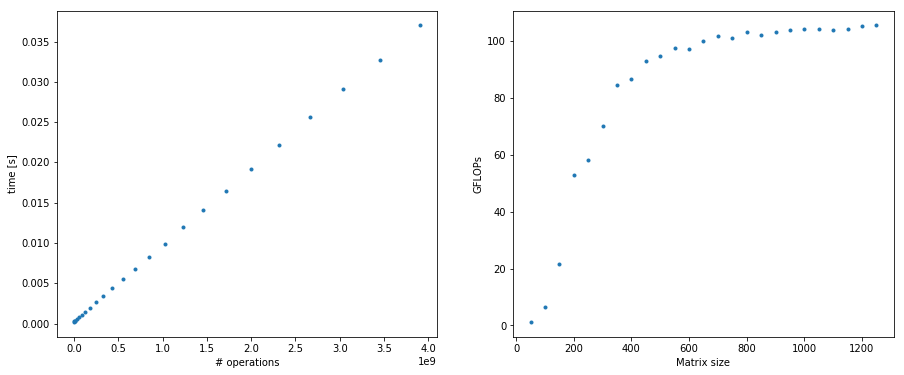

In [5]:
f, (ax1, ax2) = plt.subplots(1,2,figsize=(15, 6))

ax1.plot(opsMult,timeUsedMult,'.')
ax1.set_xlabel("# operations")
ax1.set_ylabel("time [s]")

ax2.plot(matsizeMult,opsMult*1e-9/timeUsedMult,'.')
ax2.set_xlabel("Matrix size")
ax2.set_ylabel("GFLOPs")
plt.show()

#### Run and plot convolution benchmark

In [6]:
numsteps = 25

timeUsedConv = np.zeros(numsteps)
opsConv = np.zeros(numsteps)
matsizeConv = np.zeros(numsteps)

for step in range(0,numsteps):
    matsizeConv[step] = (step+1)*50
    opsConv[step] = ((matsizeConv[step]-kernelsize+1)**2 
                     * (kernelsize**3 + (kernelsize-1)*kernelsize**2))     
    # (matsize.kernelsize+1)**2 GEMMs
    timeUsedConv[step] = benchmark_conv(matsizeConv[step],kernelsize,iterations,devlist,datatype)

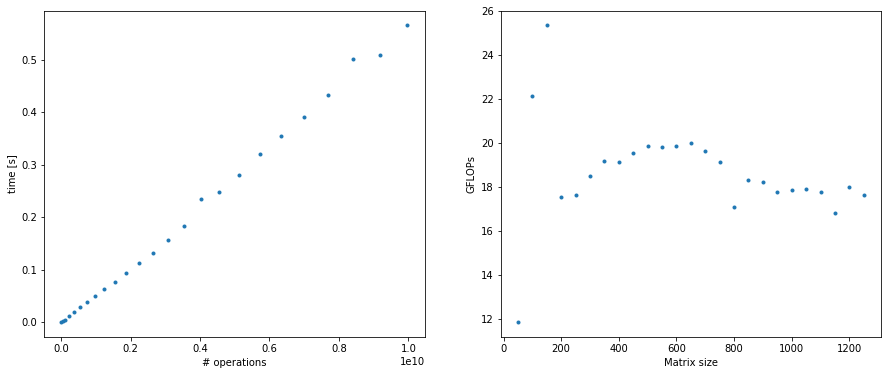

In [7]:
f, (ax1, ax2) = plt.subplots(1,2,figsize=(15, 6))

ax1.plot(opsConv,timeUsedConv,'.')
ax1.set_xlabel("# operations")
ax1.set_ylabel("time [s]")

ax2.plot(matsizeConv,opsConv*1e-9/timeUsedConv,'.')
ax2.set_xlabel("Matrix size")
ax2.set_ylabel("GFLOPs")
plt.show()

#### Parameters RNN


In [8]:
rnn_type = 'rnn'
batch_size = 32
num_samples = 10000
num_units = 32
num_classes = 10
learning_rate = 0.001
iterations_rnn = 1000

#### Run and plot RNN bechmark

In [9]:
numsteps = 50

timeUsedRNN = np.zeros(numsteps)
seq_length = np.zeros(numsteps).astype(np.int16)

for step in range(0,numsteps):
    seq_length[step] = (step+2)

    timeUsedRNN[step] = benchmark_rnn(
            rnn_type,
            seq_length[step],
            batch_size,
            num_samples,
            num_units,
            num_classes,
            learning_rate,
            iterations_rnn,
            devlist,
            datatype)

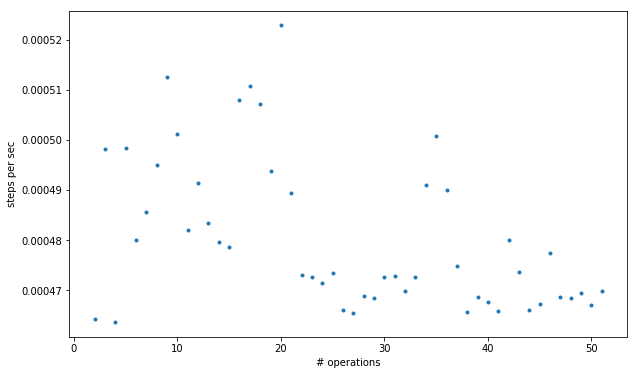

In [10]:
f, (ax1) = plt.subplots(1,1,figsize=(10, 6))
ax1.plot(seq_length,timeUsedRNN,'.')
ax1.set_xlabel("# operations")
ax1.set_ylabel("steps per sec")
plt.show()